# Image processing lab 
## Session 1: Initiation

In [3]:
import cv2
import matplotlib.pyplot as plt

### I. Image formats

#### 1. Reading the image

In [4]:
img = cv2.imread('dataset/image2.jpg')

#### 2. Displaying the image
As `cv2.imshow` causes jupyter notebooks to crash, I've decided to `matplotlib.pyplot.imshow` to display the images.
In order to do so, we should be aware that images in openCV are stored in BGR format by default (as opposed to other libraries, which use the RGB format)

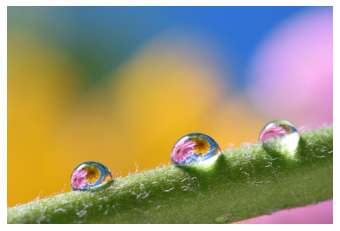

In [12]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

#### 3. RGB Format
This is a color model display format that uses the three primary colors (blue, red and green) to create an image. Each color can have up to 255 gradations. Concretely, an image is a matrix with depth of 3 containing the values for each color.

#### 4. HSL/HSV Format

From [Wikipedia](https://en.wikipedia.org/wiki/HSL_and_HSV):
> HSL (for hue, saturation, lightness) and HSV (for hue, saturation, value; also known as HSB, for hue, saturation, brightness) are alternative representations of the RGB color model, designed in the 1970s by computer graphics researchers to more closely align with the way human vision perceives color-making attributes. In these models, colors of each hue are arranged in a radial slice, around a central axis of neutral colors which ranges from black at the bottom to white at the top. 

#### Transforming RGB to HLS

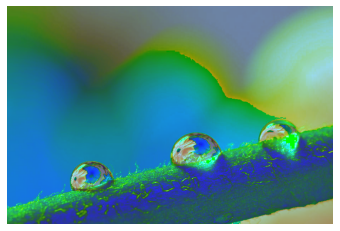

In [15]:
image_hsl = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.axis('off') # hides gridlines
plt.imshow(image_hsl)
plt.show()

#### 5. Grayscale Format
images are treated as two dimensional matrices with values ranging from 0 for darkest to 256 for brightest

#### Transforming RGB to Grayscale
the additional argument **cmap** in `plt.imshow()` is needed to display grayscale images

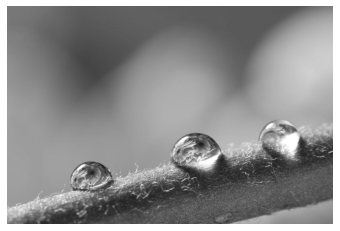

In [35]:
image_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off') # hides gridlines
plt.imshow(image_gs, cmap='gray') 
plt.show()

#### 6. Binary Format
Images in this format are similar to those in the Grayscale format. With the exception that contain pixel with grayscale values of **either** 0 **or** 256. The choice of whether assigning 0 or 256 to a given pixel is done by comparing to an arbitrary Threshold.

In [36]:
def display_binary_image(threshold):
    image_bw = cv2.threshold(image_gs, threshold, 255, cv2.THRESH_BINARY)[1]
    plt.axis('off') # hides gridlines
    plt.imshow(image_bw, cmap='gray') 
    plt.show()

##### For threshold value 110

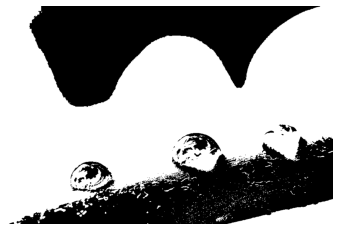

In [37]:
display_binary_image(110)

##### For threshold value 205

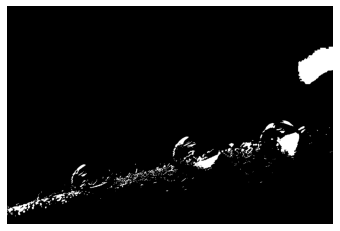

In [38]:
display_binary_image(205)

### II. Image operations

Image processing consists of performing mathematical transformations on images with the aim of improving their quality or extracting information from them. Arithmetic operations between digital images require image size normalization. 